<a href="https://colab.research.google.com/github/CseMony/MY_thesis/blob/main/Copy_of_PCA_SVM_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage import io
import pandas as pd
import os
from skimage.color import rgb2gray
from skimage import data, color, exposure
from PIL import Image

dataset_path = '/gdrive/My Drive/gt_db'

dataset_dir  = os.listdir(dataset_path)
count=0 
training_data=[]
face_image=[] 
img_size=100

train_path='/gdrive/My Drive/cropped_faces'
#class_num=13233
def create_training_data():
  
                    
  for i in os.listdir(dataset_path):
      path=['/gdrive/My Drive/gt_db/'+i]
      #print(path)
      for j in path: 
        #print(i)
          directory  = os.listdir(j)
          for k in directory:
            filename=j+'/'+k
            if k.endswith(".jpg"):
              img = io.imread(filename)
              image=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
              haar_cascade_face=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
              faces_rects = haar_cascade_face.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
              for (x,y,w,h) in faces_rects:
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
                #print(x,y,x+h,y+w)
                face_crop = image[y:y+h, x:x+w]
              #print(filename)
              cls = filename.split("/")[4]
              class_num=cls[1]+cls[2]
              class_num=int(class_num)
              class_num=class_num-1
              #print(class_num)
              
              new_array=cv2.resize(face_crop,(img_size,img_size))
              training_data.append([new_array,class_num])
            
create_training_data()     


NameError: ignored

In [ ]:
X=[]
y=[]

for feature,label in training_data:
  X.append(feature)  
  y.append(label)
X=np.array(X).reshape(len(X),img_size*img_size) 
y = np.array(y).reshape(-1, 1) 


In [ ]:
X=X/255.0

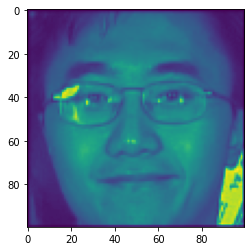

In [ ]:
plt.imshow(X[1].reshape(100,100))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=42)

In [ ]:
X.shape

(750, 10000)

In [ ]:
X_train[1].shape

(10000,)

In [ ]:
X_train.shape

(600, 10000)

In [ ]:
#mean=X_train.mean(axis=1)
#var=
#mean
n=X_train.shape[0]
mean=X_train.mean(axis=0)
sf=X_train-mean#standardize the input matrix
C=np.matmul(sf.T,sf)#covarience matrix

In [ ]:
from numpy.linalg import eig
values, vectors = eig(C)


In [ ]:
varience=[]
for i in range(1000):
  varience.append(values[i]/np.sum(values))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


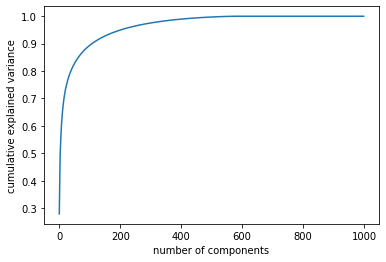

In [ ]:
plt.plot(np.cumsum(varience))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
idx = np.argsort(values)
id=idx[::-1][:100] 
eigenValues = values[id]
eigenVectors = vectors[:,id]

In [ ]:
eigenVectors.shape

(10000, 100)

In [ ]:
X_t=np.matmul(eigenVectors.T,sf.T)

In [ ]:
X_train_t=X_t.T

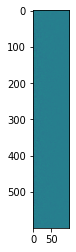

In [ ]:
feature=np.real(X_train_t)
plt.imshow(feature)

In [ ]:
feature.shape

(600, 100)

In [ ]:
test_mean=X_test.mean(axis=0)
X_test_transform=X_test-test_mean
test_data=np.matmul(eigenVectors.T,X_test_transform.T)#transform test data

In [ ]:
from sklearn.svm import SVC
classifier=SVC(probability=True)
classifier.fit(feature, y_train)
pred=classifier.predict(np.real(test_data).T)
predicted_classes = np.argmax(np.round(pred),axis=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,plot_confusion_matrix
print("Accuracy: "+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      0.67      0.80         3
           2       1.00      0.33      0.50         3
           3       0.33      0.33      0.33         3
           4       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.75      1.00      0.86         3
           7       0.67      0.67      0.67         3
           8       0.20      0.33      0.25         3
           9       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       0.60      1.00      0.75         3
          14       1.00      0.67      0.80         3
          15       0.50      1.00      0.67         3
          16       1.00      1.00      1.00         3
          17

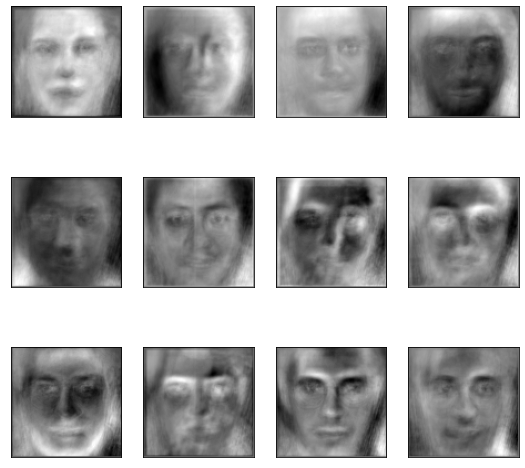

In [ ]:
def plot_gallery(images,  h, w, rows=3, cols=4):
    
    plt.figure(figsize =(1.8 * cols, 2.4 * rows)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(rows * cols):
        
        plt.subplot(rows, cols, i + 1)
        #plt.figure(figsize =(1.8 * cols, 2.4 * rows))
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(np.real(eigenVectors.T),100,100,3,4)

In [ ]:
target_names=np.unique(y)
target_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

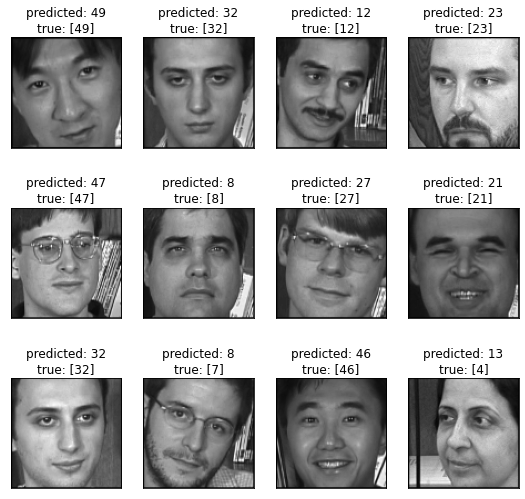

In [ ]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    
    plt.figure(figsize =(1.8 * cols, 2.4 * rows)) 
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(rows * cols):
        
        plt.subplot(rows, cols, i + 1)
        #plt.figure(figsize =(1.8 * cols, 2.4 * rows))
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
def titles(pred, y_test, target_names):
    for i in range(pred.shape[0]):
        pred_name = target_names[pred[i]]
        true_name = target_names[y_test[i]]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
prediction_titles = list(titles(pred
                                , y_test, target_names))
plot_gallery(X_test, prediction_titles, 100, 100) 

In [ ]:
n_classes = 50

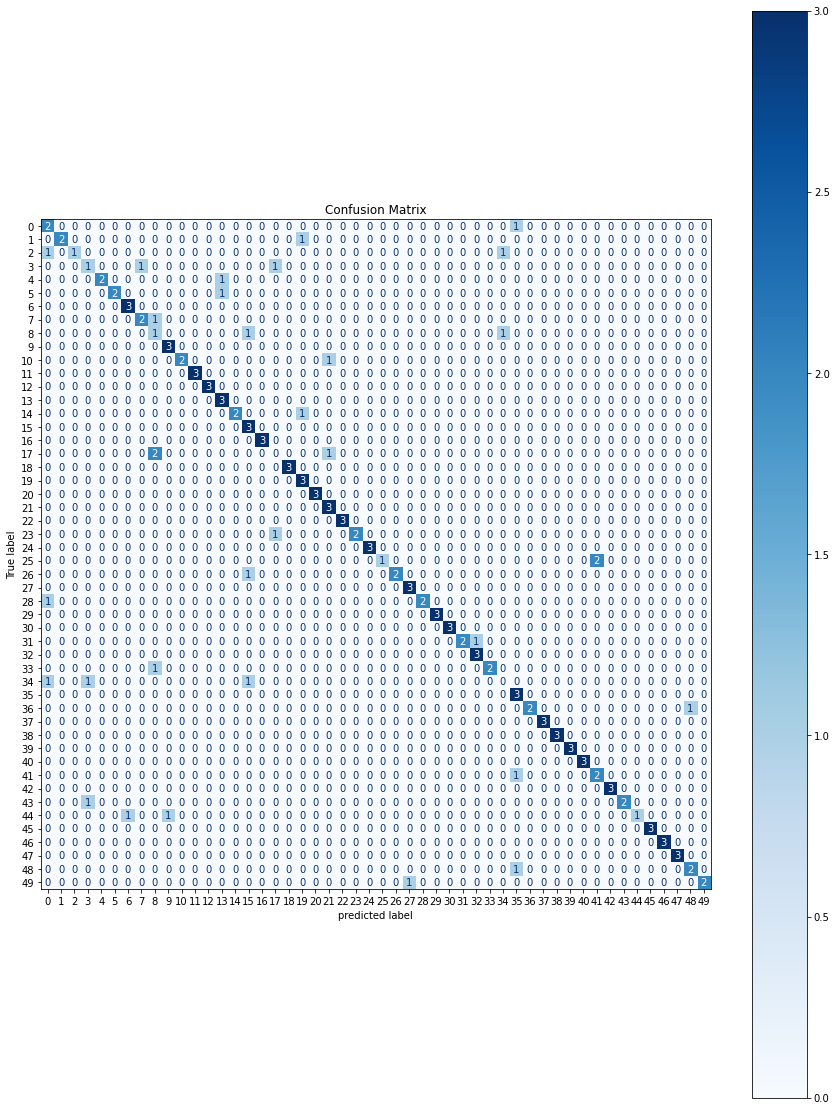

In [ ]:
matrix=plot_confusion_matrix(classifier,test_data.real.T,y_test,cmap=plt.cm.Blues)
matrix.ax_.set_title("Confusion Matrix",color='black')
plt.xlabel('predicted label',color='black')
plt.ylabel('True label',color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(15,20)
plt.show()

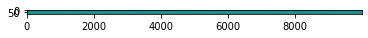

In [ ]:
plt.imshow(np.real(eigenVectors.T))

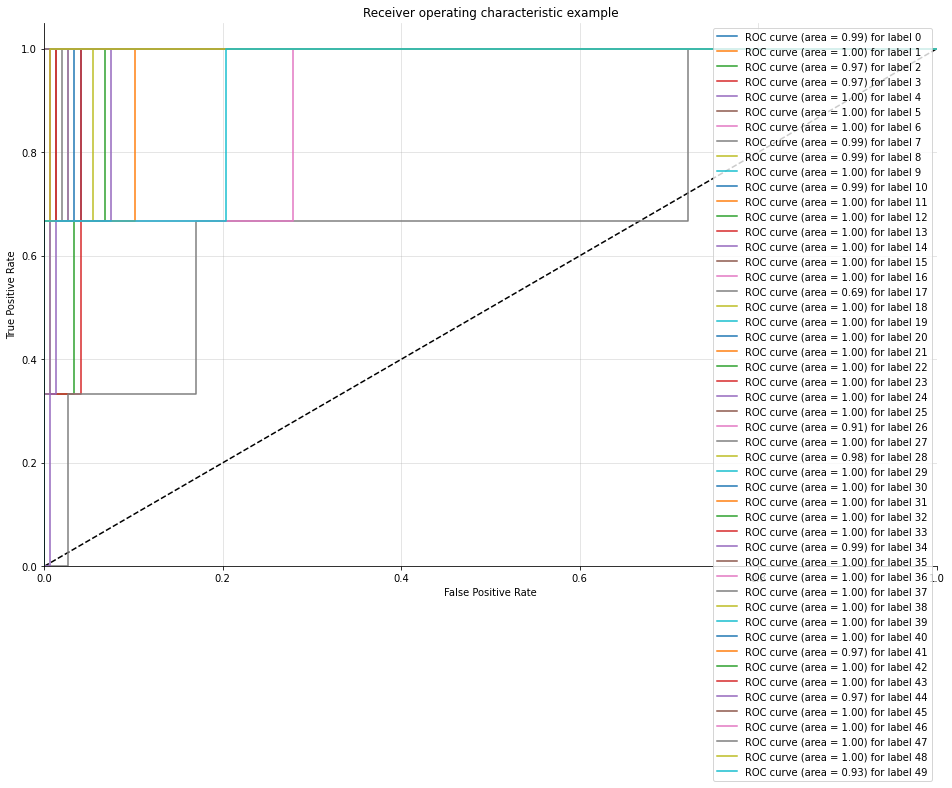

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
threshold= dict()
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def plot_multiclass_roc(classifier, X_test, y_test, n_classes, figsize=(17, 6)):
    y_prob = classifier.predict_proba(X_test)

    # structures
 

    # calculate dummies once
  
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:,i],pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(classifier,np.real(test_data).T, y_test, n_classes=50, figsize=(16, 10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


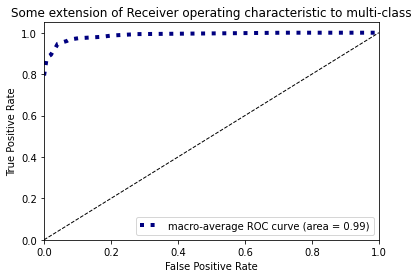

In [ ]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
values.shape

(10000,)